In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import statsmodels.api as sm

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is AA58-A46D

 Directory of C:\Users\dell\Downloads\Telegram Desktop

06/07/2024  09:13 PM    <DIR>          .
06/07/2024  09:13 PM    <DIR>          ..
06/07/2024  09:06 PM    <DIR>          .ipynb_checkpoints
05/30/2024  10:46 AM               922 1.01. Simple linear regression - JAMB.csv
06/06/2024  03:48 PM             1,018 1.02. Multiple linear regression - JAMB.csv
06/06/2024  03:48 PM             1,451 2.01.+Admittance JAMB.csv
06/04/2024  03:09 PM            92,573 corrected Linear Regression Assignment .ipynb
05/25/2024  08:46 PM            10,033 DS Lesson Day 1 - Numpy.ipynb
05/28/2024  12:22 PM           794,628 face_deteection.zip
06/05/2024  09:09 PM            58,997 Linear Regression (2).ipynb
06/06/2024  01:31 PM           154,765 Linear Regression (3) Sk learn.ipynb
06/07/2024  07:49 PM           154,067 Linear Regression (3).ipynb
06/03/2024  01:41 AM            64,443 Linear Regression Assignment  (2).ipynb
05/

In [27]:
raw_data = pd.read_csv("Social_Network_Ads.csv")
data = raw_data.copy()

data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [29]:
data.drop("User ID", axis=1, inplace=True)


In [33]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [55]:
x1 = data["EstimatedSalary"]
y = data["Purchased"]
x1

0      19000
1      20000
2      43000
3      57000
4      76000
       ...  
395    41000
396    23000
397    20000
398    33000
399    36000
Name: EstimatedSalary, Length: 400, dtype: int64

In [56]:
X = sm.add_constant(x1)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Purchased   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     60.05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           7.77e-14
Time:                        22:29:15   Log-Likelihood:                -245.27
No. Observations:                 400   AIC:                             494.5
Df Residuals:                     398   BIC:                             502.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0021      0.051      0.041      0.967      -0.098       0.102
EstimatedSalary  5.096e-06   6.58e-07      7.749      0.000     3.8e-06    6.39e-06
==============================================================================
Omnibus:                      101.259   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.943
Skew:                           0.688   Prob(JB):                     3.88e-11
Kurtosis:                       2.010   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\dell\AppData\Local\Temp\ipykernel_19388\2973899341.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = model.params[0] + model.params[1] * x1


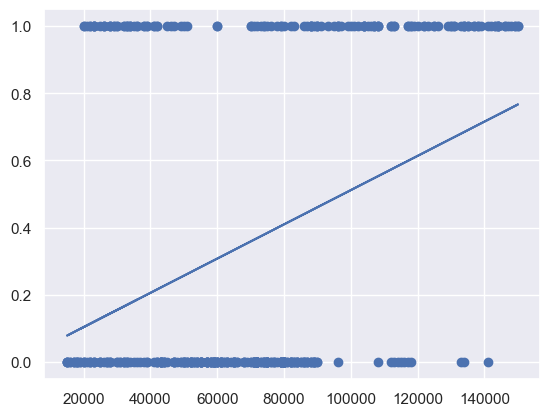

In [57]:
y_pred = model.params[0] + model.params[1] * x1

plt.scatter(x1, y)

plt.plot(x1, y_pred)

In [58]:
model_log = sm.Logit(y, X).fit()
model_log.summary()

Optimization terminated successfully.
         Current function value: 0.584658
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.1032
Time:                        22:30:39   Log-Likelihood:                -233.86
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 2.168e-13
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3227      0.286     -8.134      0.000      -2.882      -1.763
EstimatedSalary  2.387e-05   3.52e-06      6.790      0.000     1.7e-05    3.08e-05
===================================================================================
"""

In [60]:
def logistic_function(b0, b1, X):
    return np.exp(b0 + (b1 * X)) / (1 + np.exp(b0 + (b1 * X)))

In [62]:
X_sorted = np.sort(x1)
X_sorted

array([ 15000,  15000,  15000,  15000,  16000,  16000,  17000,  17000,
        17000,  18000,  18000,  18000,  18000,  19000,  19000,  20000,
        20000,  20000,  20000,  20000,  21000,  21000,  22000,  22000,
        22000,  22000,  22000,  23000,  23000,  23000,  23000,  23000,
        23000,  23000,  25000,  25000,  25000,  25000,  26000,  26000,
        26000,  26000,  27000,  27000,  27000,  28000,  28000,  28000,
        28000,  28000,  28000,  29000,  29000,  30000,  30000,  30000,
        30000,  31000,  31000,  32000,  32000,  32000,  32000,  32000,
        33000,  33000,  33000,  33000,  33000,  33000,  34000,  34000,
        34000,  34000,  35000,  35000,  36000,  36000,  36000,  37000,
        38000,  38000,  38000,  39000,  39000,  39000,  39000,  41000,
        41000,  41000,  42000,  42000,  42000,  42000,  42000,  43000,
        43000,  43000,  43000,  43000,  43000,  43000,  44000,  44000,
        44000,  44000,  45000,  45000,  46000,  47000,  47000,  47000,
      

In [63]:
f_sorted = logistic_function(model_log.params[0], model_log.params[1], X_sorted)

C:\Users\dell\AppData\Local\Temp\ipykernel_19388\659442553.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = logistic_function(model_log.params[0], model_log.params[1], X_sorted)


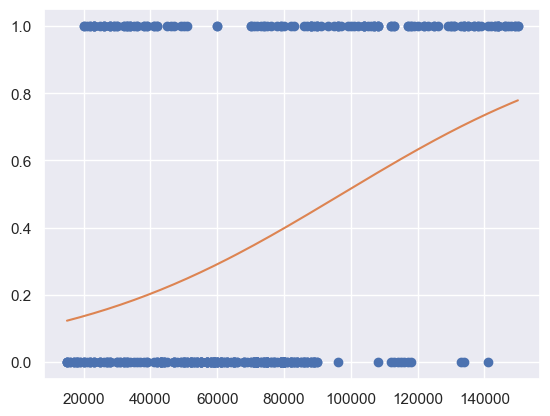

In [68]:
plt.scatter(x1, y)
plt.plot(X_sorted, f_sorted, color="C1")

In [69]:
raw_data.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0
